In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
             'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
             'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 
             'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 
             'view':int}
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict, parse_dates=['date'])
train_data = pd.read_csv('kc_house_train_data.csv', dtype=dtype_dict, parse_dates=['date'])
test_data = pd.read_csv('kc_house_test_data.csv', dtype=dtype_dict, parse_dates=['date'])

In [3]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [4]:
def simple_linear_regression(input_feature, output):
    slope = np.cov(input_feature, output)[0, 1]/np.cov(input_feature, input_feature)[0, 1]
    intercept = np.mean(output) - slope * np.mean(input_feature)
    return (intercept, slope)

def get_regression_predictions(input_feature, intercept, slope):
    predicted_output = intercept + slope * input_feature
    return predicted_output

def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    RSS = np.square(get_regression_predictions(input_feature, intercept, slope) - output).sum()
    return RSS

def inverse_regression_predictions(output, intercept, slope):
    estimated_input = (output - intercept) / slope
    return estimated_input

In [5]:
input_feature = train_data['sqft_living']
output = train_data['price']

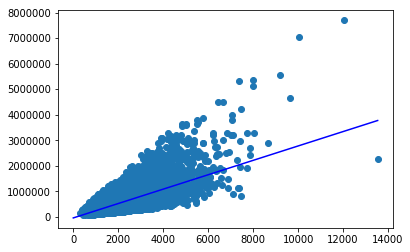

In [6]:
intercept, slope = simple_linear_regression(input_feature, output)
plt.close('all')
plt.figure()
plt.scatter(input_feature, output)
x = np.linspace(0, max(input_feature))
plt.plot(x, get_regression_predictions(x, intercept, slope), 'b-')
plt.show()

In [7]:
output_single = get_regression_predictions(2650, intercept, slope)
print(output_single)

700074.845948


In [8]:
RSS = get_residual_sum_of_squares(input_feature, output=output, intercept=intercept, slope=slope)
print('{:6.3e}'.format(RSS))

1.202e+15


In [9]:
inverse_regression_predictions(800000, intercept, slope)

3004.3962451522771

In [10]:
input_feature2 = train_data['bedrooms']
intercept2, slope2 = simple_linear_regression(input_feature2, output)

In [11]:
RSS2 = get_residual_sum_of_squares(input_feature2, output=output, intercept=intercept2, slope=slope2)
print('{:6.3e}'.format(RSS2))

2.143e+15
